# Train the Model

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#  Load the cleaned dataset
df = pd.read_csv(r"C:\Users\hp\Desktop\Projects\Fake_news_detection\data\cleaned_news.csv")
df = df.dropna(subset=['clean_text'])

#  TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#  Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#  Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f" Accuracy:  {accuracy:.4f}")
print(f" Precision: {precision:.4f}")
print(f" Recall:    {recall:.4f}")
print(f" F1 Score:  {f1:.4f}")


 Accuracy:  0.9845
 Precision: 0.9868
 Recall:    0.9815
 F1 Score:  0.9841


# Confusion Matrix

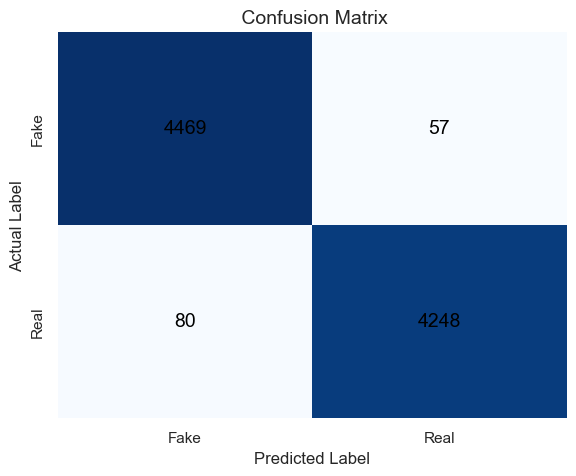

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Fake', 'Real']

# Create heatmap
plt.figure(figsize=(6, 5))
ax = sns.heatmap(cm, annot=False, cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)

# Add manual annotations to all cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = f"{cm[i, j]}"
        ax.text(j + 0.5, i + 0.5, text, ha='center', va='center', color='black', fontsize=14)

# Set titles and labels
ax.set_xlabel("Predicted Label", fontsize=12)
ax.set_ylabel("Actual Label", fontsize=12)
ax.set_title(" Confusion Matrix", fontsize=14)
ax.tick_params(axis='both', labelsize=11)

plt.tight_layout()
plt.show()


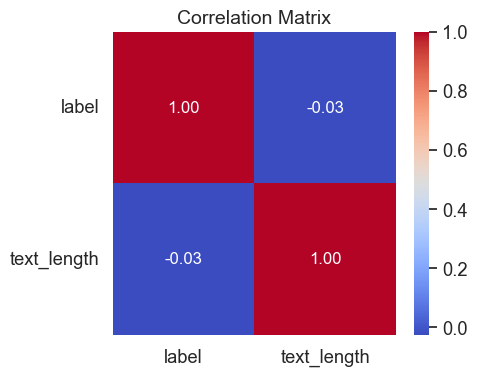

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Compute correlation matrix
corr_matrix = df[['label', 'text_length']].corr()

# Create the heatmap
plt.figure(figsize=(5, 4))
ax = sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', cbar=True)

# Manually add text to all cells
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        text = f"{corr_matrix.iloc[i, j]:.2f}"
        ax.text(j + 0.5, i + 0.5, text, ha='center', va='center', color='white', fontsize=12)

# Fix axes
ax.set_xticklabels(corr_matrix.columns, rotation=0)
ax.set_yticklabels(corr_matrix.index, rotation=0)
plt.title("Correlation Matrix", fontsize=14)
plt.tight_layout()
plt.show()


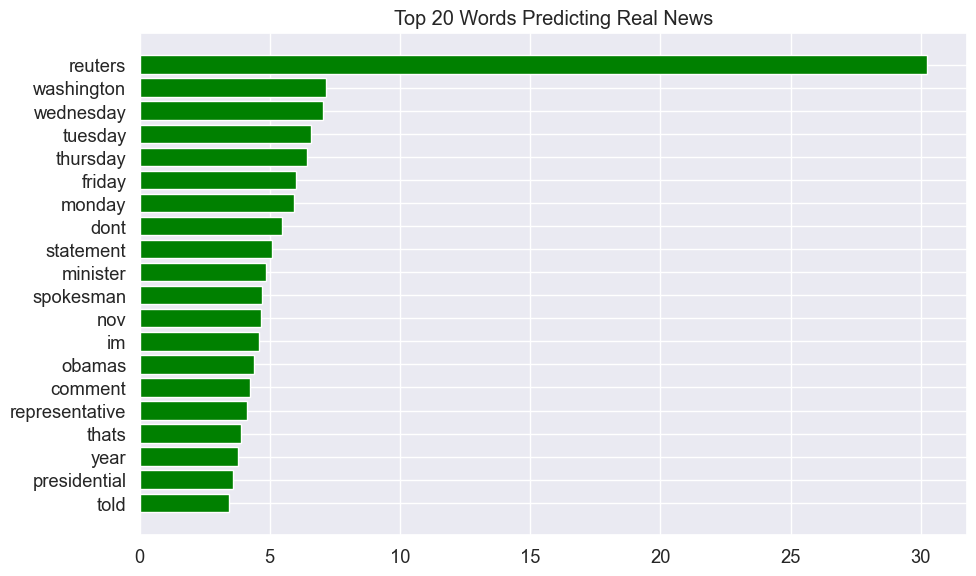

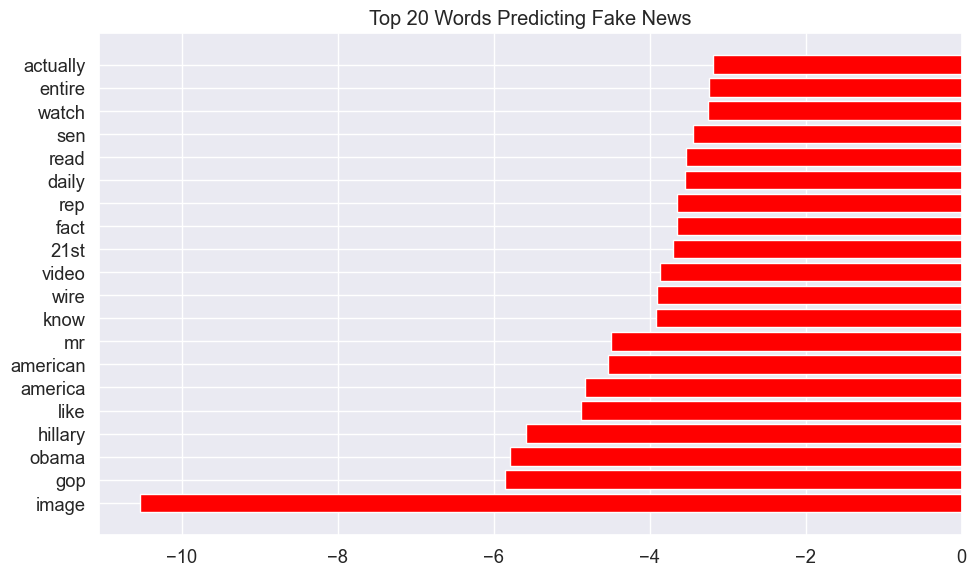

In [17]:
# Get feature importance from logistic regression
feature_names = vectorizer.get_feature_names_out()
coefs = model.coef_[0]

# Top 20 positive and negative words
top_real = np.argsort(coefs)[-20:]
top_fake = np.argsort(coefs)[:20]

plt.figure(figsize=(10, 6))
plt.barh(range(20), coefs[top_real], color='green')
plt.yticks(range(20), feature_names[top_real])
plt.title("Top 20 Words Predicting Real News")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(range(20), coefs[top_fake], color='red')
plt.yticks(range(20), feature_names[top_fake])
plt.title("Top 20 Words Predicting Fake News")
plt.tight_layout()
plt.show()
